In [108]:
import mglearn

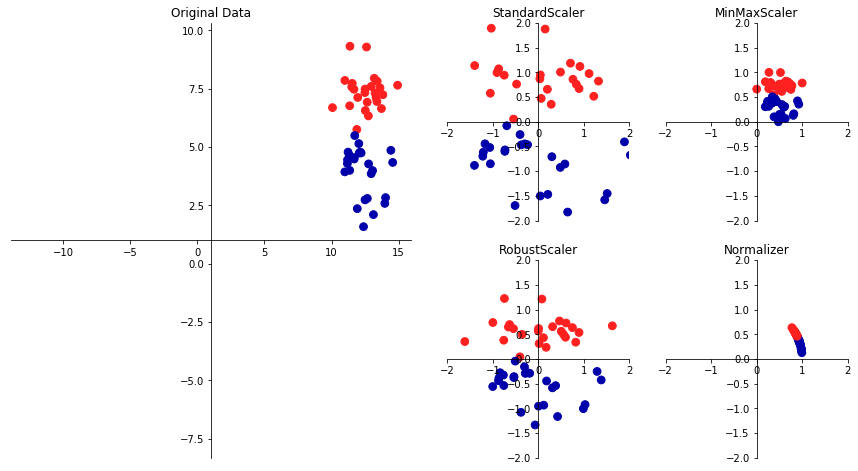

In [109]:
mglearn.plots.plot_scaling()

## 3.1 데이터 전처리와 스케일 조정 

In [110]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [111]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [112]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [113]:
X_train_scaled = scaler.transform(X_train)

print('before scale min value by feature', X_train.min(axis=0))
print('before scale max value by feature', X_train.max(axis=0))
print('after scale min value by feature', X_train_scaled.min(axis=0))
print('after scale max value by feature', X_train_scaled.max(axis=0))

before scale min value by feature [7.691e+00 9.710e+00 4.792e+01 1.704e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.167e-01 4.996e-02 1.115e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 7.882e-03 8.948e-04 8.678e+00
 1.202e+01 5.449e+01 2.236e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
before scale max value by feature [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.114e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.184e-01 9.379e-01 9.608e-01 2.910e-01
 6.638e-01 1.730e-01]
after scale min value by feature [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
after scale max value by feature [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [114]:
X_test_scaled = scaler.transform(X_test)

print('before scale min value by feature', X_test.min(axis=0))
print('before scale max value by feature', X_test.max(axis=0))
print('after scale min value by feature', X_test_scaled.min(axis=0))
print('after scale max value by feature', X_test_scaled.max(axis=0))

before scale min value by feature [6.981e+00 1.038e+01 4.379e+01 1.435e+02 6.576e-02 3.558e-02 0.000e+00
 0.000e+00 1.060e-01 5.266e-02 1.166e-01 3.628e-01 7.714e-01 8.955e+00
 3.169e-03 5.656e-03 0.000e+00 0.000e+00 9.539e-03 1.219e-03 7.930e+00
 1.249e+01 5.041e+01 1.852e+02 8.799e-02 5.494e-02 0.000e+00 0.000e+00
 1.566e-01 5.905e-02]
before scale max value by feature [2.522e+01 3.112e+01 1.715e+02 1.878e+03 1.371e-01 3.454e-01 3.754e-01
 1.845e-01 2.906e-01 8.243e-02 1.291e+00 3.896e+00 9.635e+00 1.997e+02
 1.604e-02 1.064e-01 3.038e-01 3.322e-02 7.895e-02 2.286e-02 3.249e+01
 4.716e+01 2.140e+02 3.432e+03 2.226e-01 1.058e+00 1.252e+00 2.903e-01
 5.440e-01 2.075e-01]
after scale min value by feature [-0.03477154  0.0226581  -0.02937829 -0.01154209  0.1185339   0.05547565
  0.          0.         -0.0571276   0.05686605  0.00184682  0.00057461
  0.00067851  0.00402131  0.04949519  0.02556554  0.          0.
  0.03092687  0.01120048 -0.02733718  0.01252665 -0.02074119 -0.00952759
  0

In [115]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

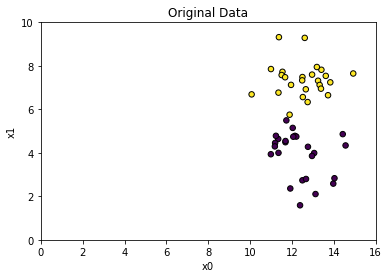

In [116]:
X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3

plt.scatter(X[:,0], X[:,1], c=y, s=30, edgecolors='black')
plt.xlim(0,16)
plt.xlabel('x0')
plt.ylim(0,10)
plt.ylabel('x1')
plt.title('Original Data')
plt.show()

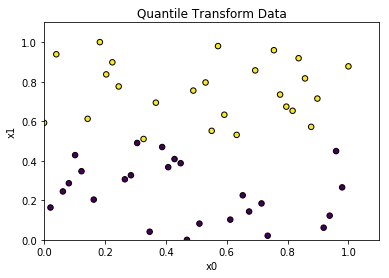

In [117]:
scaler = QuantileTransformer()
X_trans = scaler.fit_transform(X) 

plt.scatter(X_trans[:,0], X_trans[:,1], c=y, s=30, edgecolors='black')
plt.xlim(0,1.1)
plt.xlabel('x0')
plt.ylim(0,1.1)
plt.ylabel('x1')
plt.title('Quantile Transform Data')
plt.show()

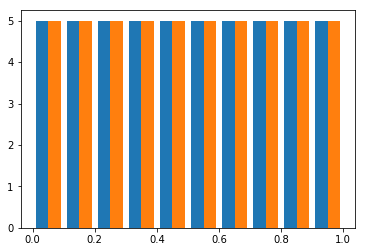

In [118]:
plt.hist(X_trans)
plt.show()

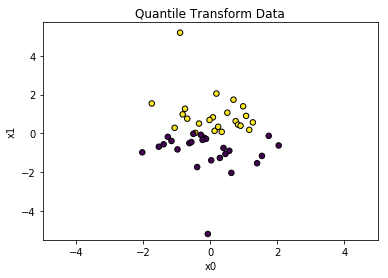

In [119]:
scaler = QuantileTransformer(output_distribution='normal')
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:,0], X_trans[:,1], c=y, s=30, edgecolors='black')
plt.xlim(-5,5)
plt.xlabel('x0')
plt.ylim(-5.5)
plt.ylabel('x1')
plt.title('Quantile Transform Data')
plt.show()

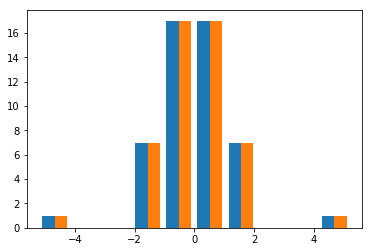

In [120]:
plt.hist(X_trans)
plt.show()

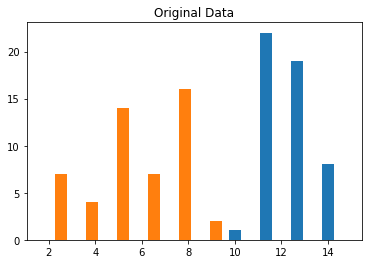

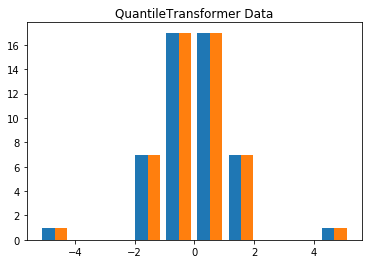

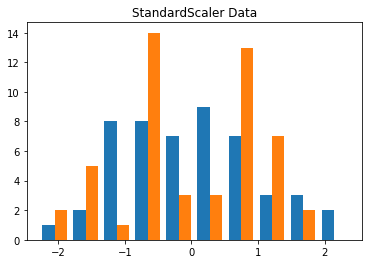

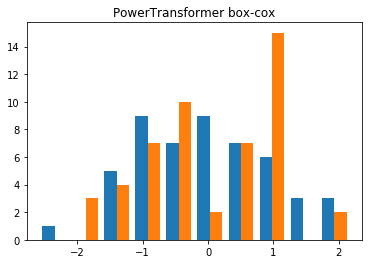

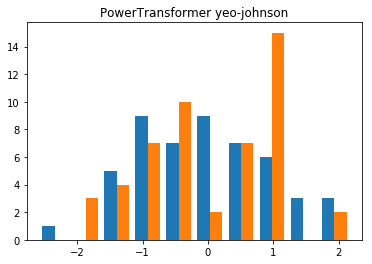

In [121]:
plt.hist(X)
plt.title('Original Data')
plt.show()

X_trans = QuantileTransformer(output_distribution='normal').fit_transform(X)
plt.hist(X_trans)
plt.title('QuantileTransformer Data')
plt.show()

X_trans = StandardScaler().fit_transform(X)
plt.hist(X_trans)
plt.title('StandardScaler Data')
plt.show()

X_trans = PowerTransformer(method='box-cox').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer box-cox')
plt.show()

X_trans = PowerTransformer(method='yeo-johnson').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer yeo-johnson')
plt.show()

## 3.2 차원 축소, 특성 추출, 매니폴드 학습

### 3.2.1 주성분 분석(PCA)

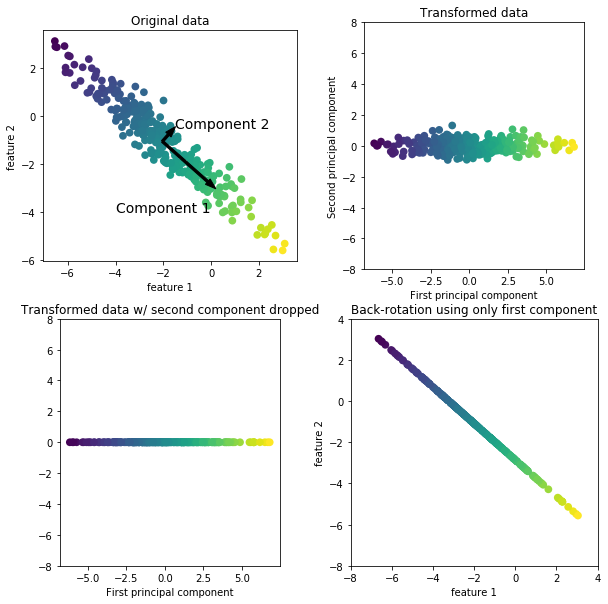

In [122]:
mglearn.plots.plot_pca_illustration()

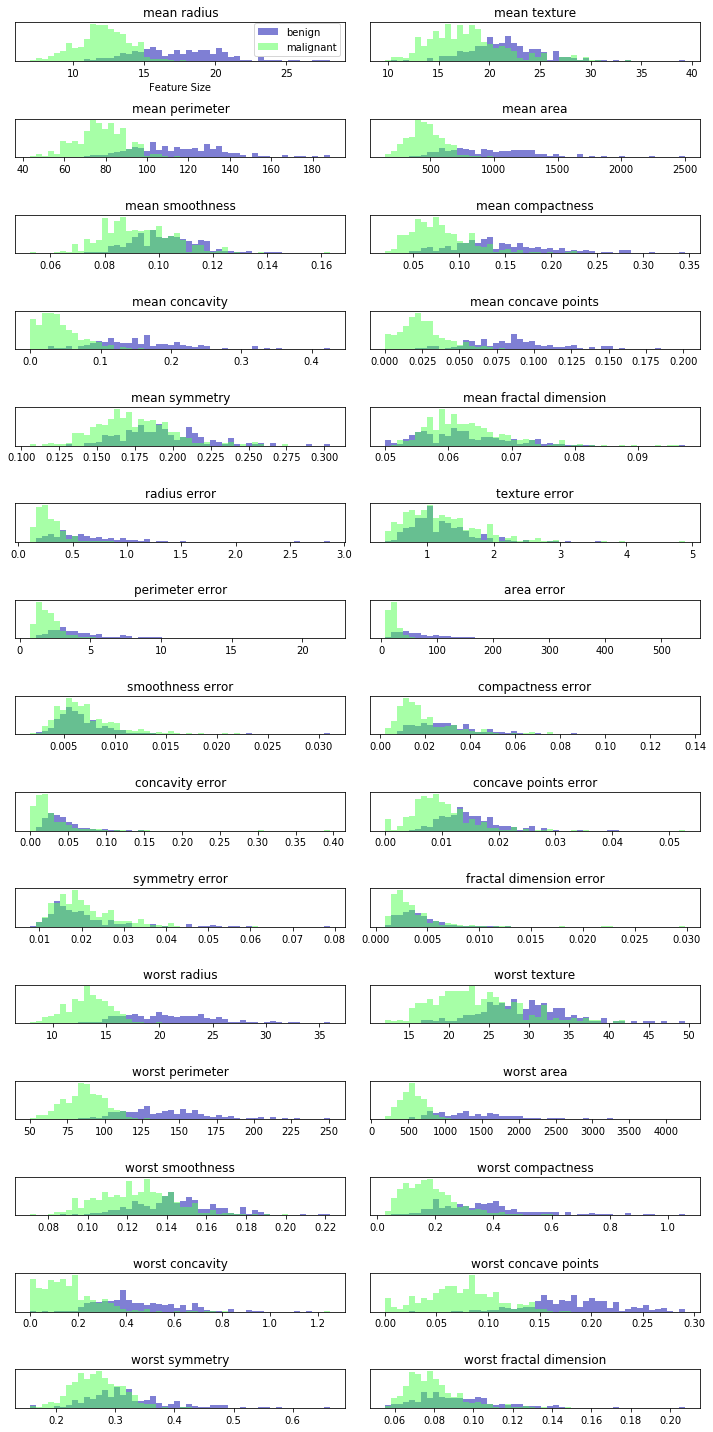

In [123]:
fig, axes = plt.subplots(15, 2, figsize=(10,20))
malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:,i], bins=50)
    ax[i].hist(malignant[:,i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:,i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel('Feature Size')
ax[0].set_label('Frequency')
ax[0].legend(['benign', 'malignant'], loc='best')
fig.tight_layout()

In [124]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [125]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)

print('Original Data Shape', str(X_scaled.shape))
print('Decomposite Data Shape', str(X_pca.shape))

Original Data Shape (569, 30)
Decomposite Data Shape (569, 2)


Text(0,0.5,'2nd Priciple Component')

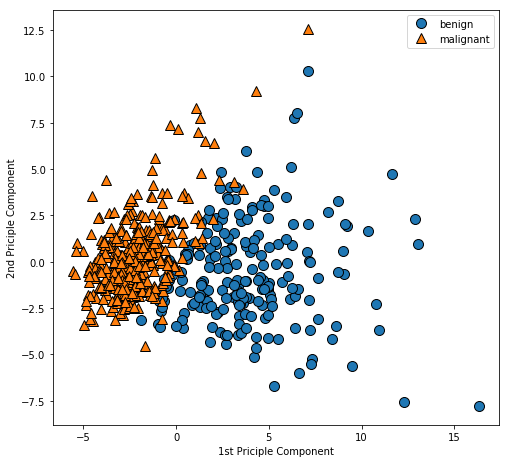

In [126]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1], cancer.target)
plt.legend(['benign', 'malignant'], loc='best')
plt.gca().set_aspect('equal')
plt.xlabel('1st Priciple Component')
plt.ylabel('2nd Priciple Component')

In [127]:
print('PCA Shape', pca.components_.shape)
print('PCA Shape', pca.components_)

PCA Shape (2, 30)
PCA Shape [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0,0.5,'Component')

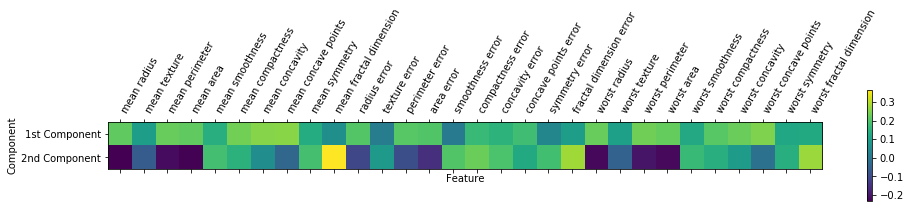

In [128]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1], ['1st Component', '2nd Component'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel('Feature')
plt.ylabel('Component')

### 3.2 Eigenface Feature Extract

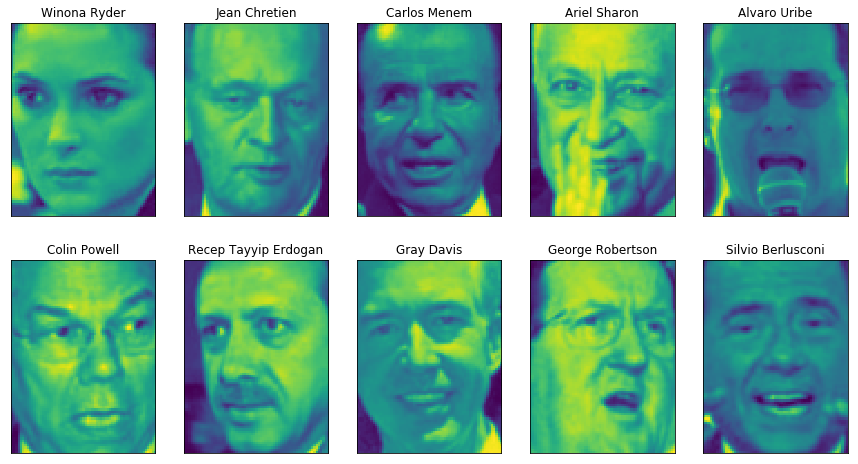

In [129]:
from sklearn.datasets import fetch_lfw_people
%matplotlib inline
people = fetch_lfw_people(min_faces_per_person=20, resize=.7)
image_shape = people.images[0].shape

fig, axs = plt.subplots(2,5, figsize=(15,8), subplot_kw={'xticks' : (), 'yticks' :  ()})
for target, image, ax in zip(people.target, people.images, axs.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [130]:
print('people.images.shape', people.images.shape)
print('Class Count', len(people.target_names))

people.images.shape (3023, 87, 65)
Class Count 62


In [131]:
images = people.images[people.target == 61]

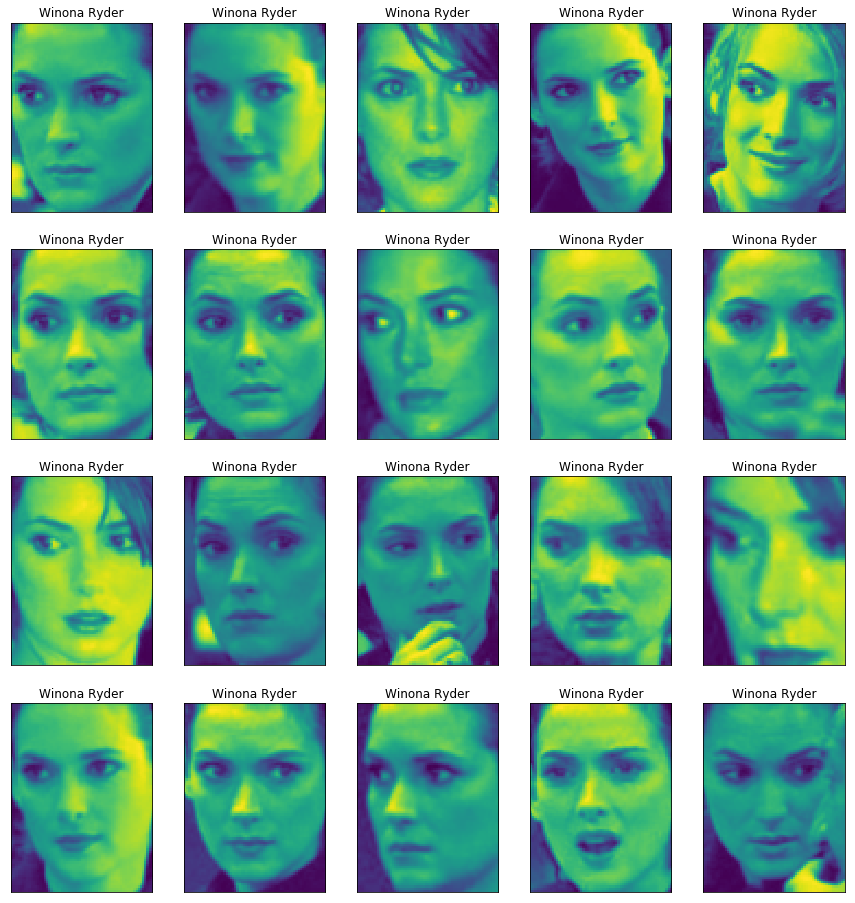

In [132]:
fig, axs = plt.subplots(int(len(images)/5),5,figsize=(15,16), subplot_kw={'xticks' : (), 'yticks' :  ()})
for image, ax in zip(images, axs.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[61])

In [133]:
counts = np.bincount(people.target)
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end = '   ')
    if (i+1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

In [206]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255.

In [135]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify = y_people, random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print('1-KNeighborClass Test Score : {:.2f}'.format(knn.score(X_test, y_test)))

1-KNeighborClass Test Score : 0.23


In [136]:
prediction = knn.predict(X_test)

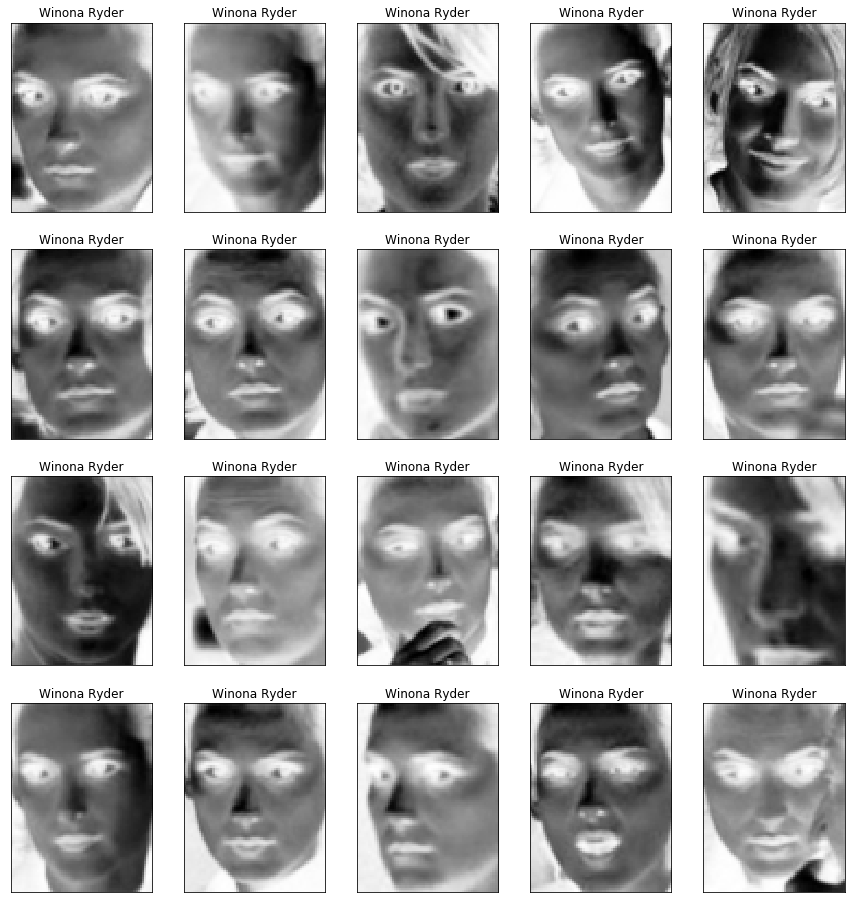

In [137]:
fig, axs = plt.subplots(int(len(images)/5),5,figsize=(15,16), subplot_kw={'xticks' : (), 'yticks' :  ()})
for image, ax in zip(images, axs.ravel()):
    ax.imshow(image.reshape(87,65), cmap='Greys')
    ax.set_title(people.target_names[61])

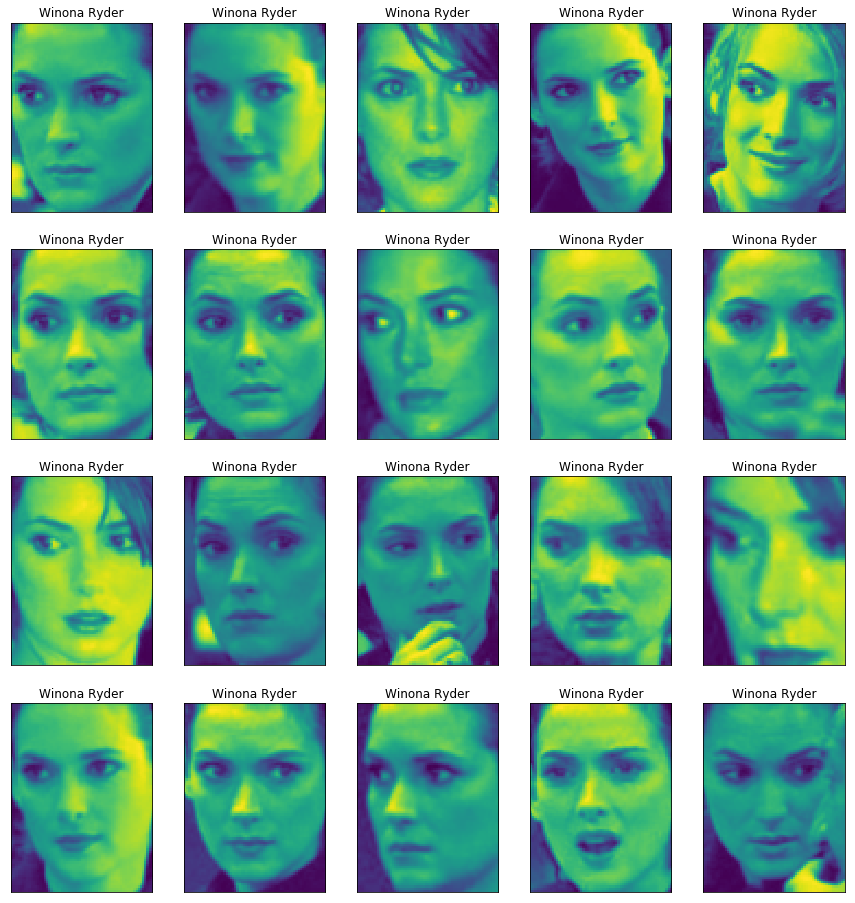

In [138]:
fig, axs = plt.subplots(int(len(images)/5),5,figsize=(15,16), subplot_kw={'xticks' : (), 'yticks' :  ()})
for image, ax in zip(images, axs.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[61])

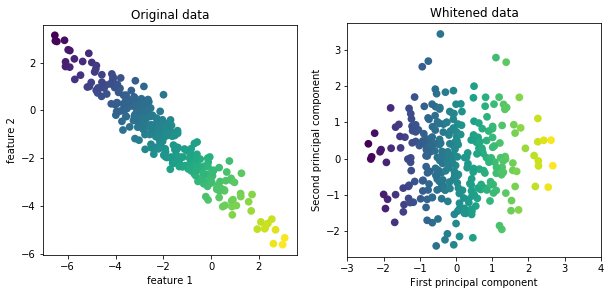

In [139]:
mglearn.plots.plot_pca_whitening()

In [140]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print('X_train_pca.shape:', X_train_pca.shape)

X_train_pca.shape: (1547, 100)


In [141]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)

print('1-KNeighborClass Test Score : {:.2f}'.format(knn.score(X_test_pca, y_test)))

1-KNeighborClass Test Score : 0.31


In [142]:
print('pca.components_.shape', pca.components_.shape)

pca.components_.shape (100, 5655)


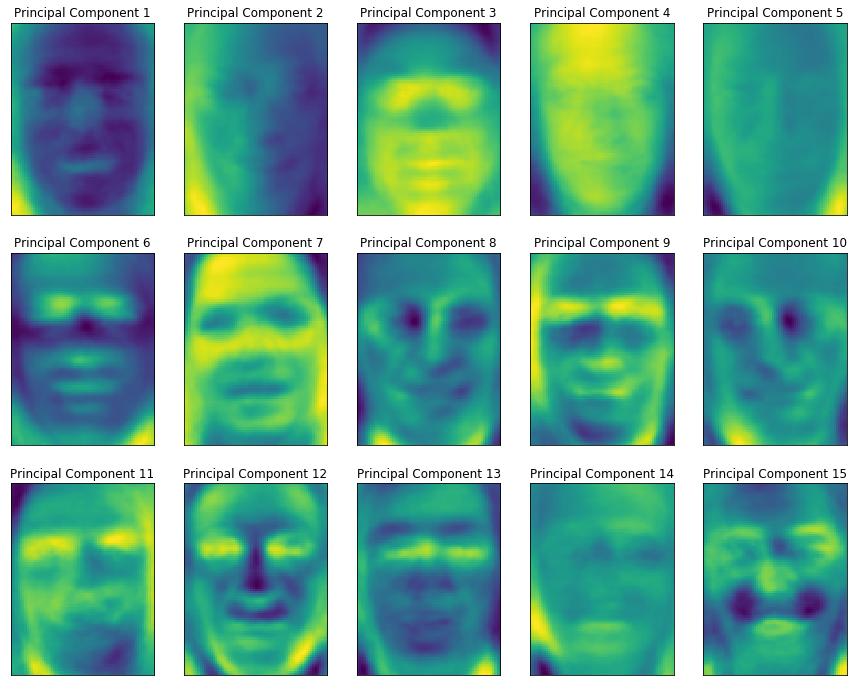

In [143]:
fig, axs = plt.subplots(3,5, figsize=(15,12), subplot_kw={'xticks':(), 'yticks':()})
for i, (component, ax) in enumerate(zip(pca.components_, axs.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title('Principal Component {}'.format((i+1)))

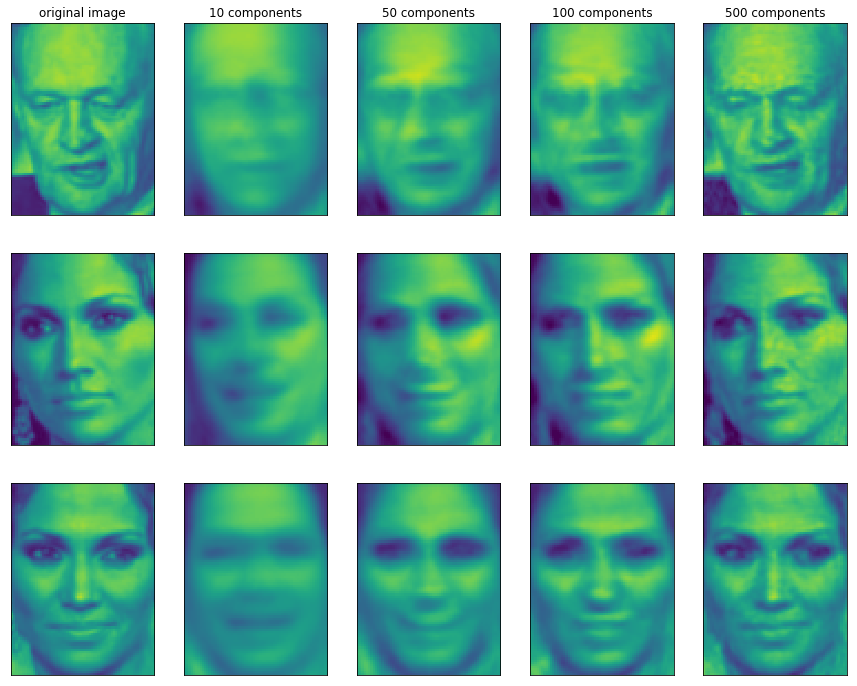

In [144]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

Text(0,0.5,'2nd Principal Component')

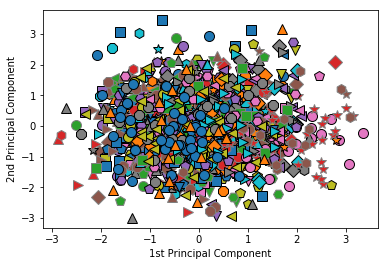

In [145]:
mglearn.discrete_scatter(X_train_pca[:,0], X_train_pca[:,1], y_train)
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')

### 3.3 NMF(Non-negative Matrix FActorization)

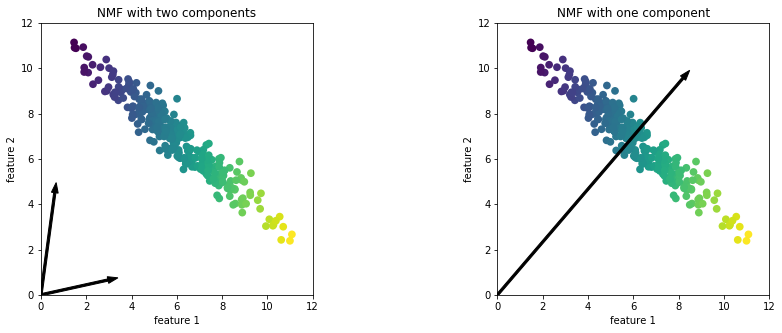

In [146]:
mglearn.plots.plot_nmf_illustration()

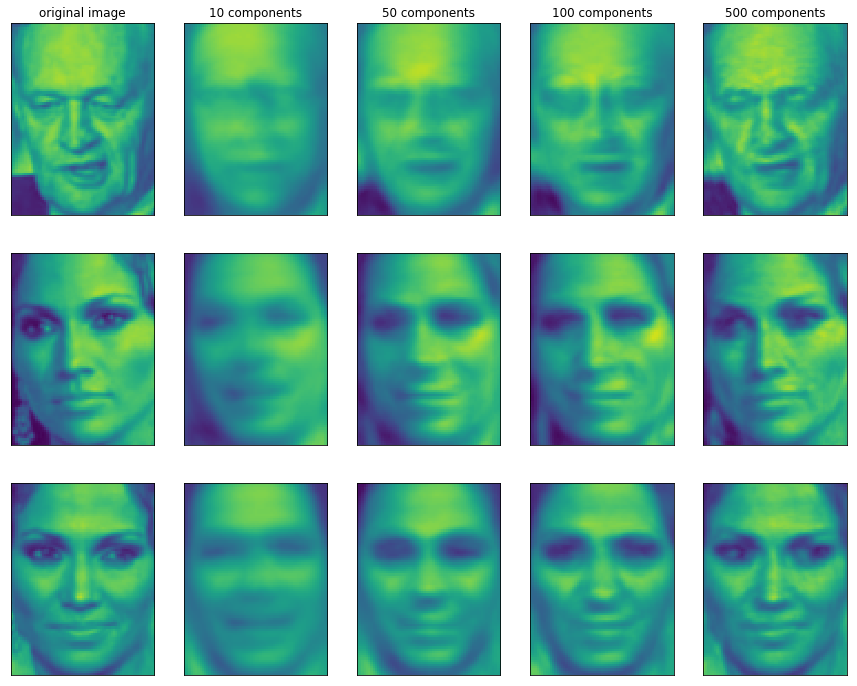

In [147]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

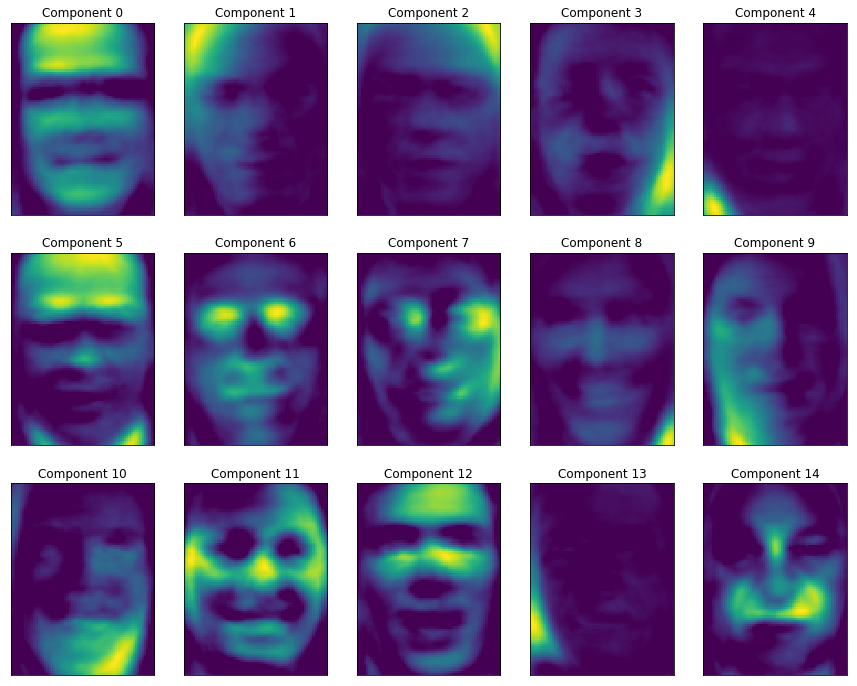

In [148]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axs = plt.subplots(3,5, figsize=(15,12), subplot_kw={'xticks':(), 'yticks':()})

for i , (component, ax) in enumerate(zip(nmf.components_, axs.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title('Component {}'.format(i))

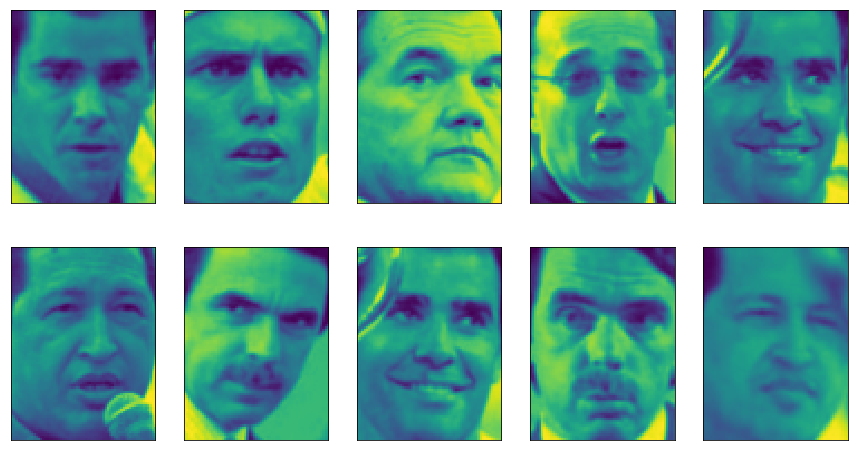

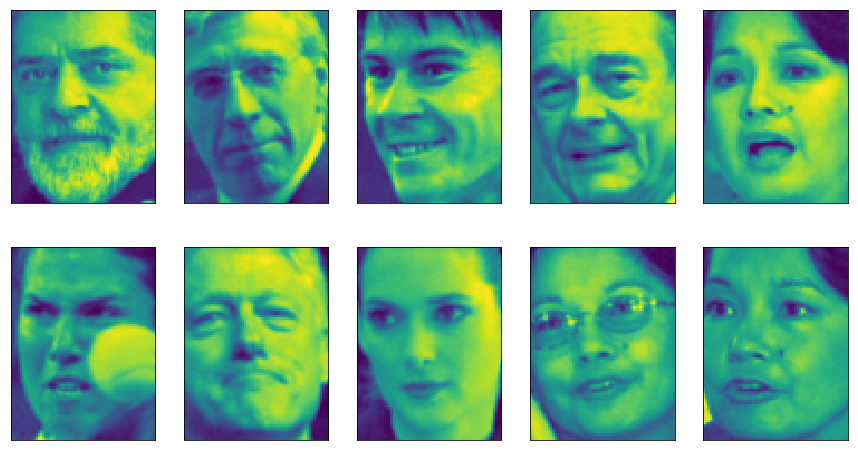

In [151]:
comp = 3
inds = np.argsort(X_train_nmf[:,comp])[::-1]
fig, axs = plt.subplots(2,5,figsize=(15,8), subplot_kw={'xticks':(), 'yticks':()})
for i, (ind, ax) in enumerate(zip(inds, axs.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

comp = 7
inds = np.argsort(X_train_nmf[:,comp])[::-1]
fig, axs = plt.subplots(2,5,figsize=(15,8), subplot_kw={'xticks':(), 'yticks':()})
for i, (ind, ax) in enumerate(zip(inds, axs.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

Text(0,0.5,'Signal')

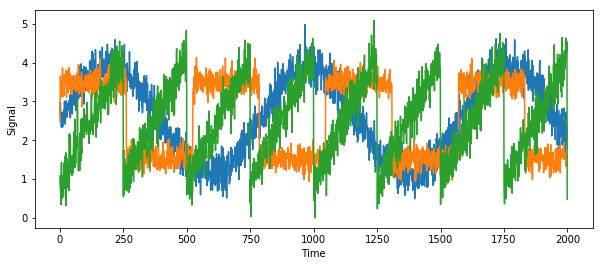

In [154]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(10,4))
plt.plot(S,'-')
plt.xlabel('Time')
plt.ylabel('Signal')

In [155]:
A = np.random.RandomState(0).uniform(size=(100,3))
X = np.dot(S, A.T)
print('Shape of Data:', X.shape)

Shape of Data: (2000, 100)


In [156]:
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print('Restored Signal Data Shape', S_.shape)

Restored Signal Data Shape (2000, 3)


In [157]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

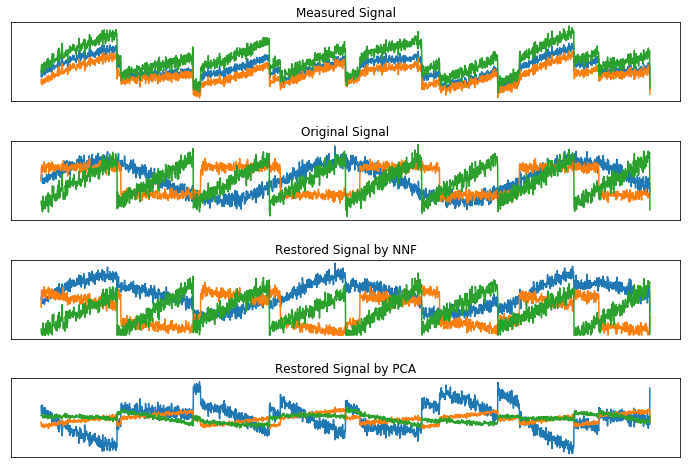

In [160]:
models = [X,S,S_,H]
names = ['Measured Signal', 'Original Signal', 'Restored Signal by NNF', 'Restored Signal by PCA']

fig, axs = plt.subplots(4, figsize=(12,8), gridspec_kw={'hspace':.5}, subplot_kw={'xticks':(), 'yticks':()})

for model, name, ax in zip(models, names, axs):
    ax.set_title(name)
    ax.plot(model[:,:3],'-')

## 3.3 Manifold learning using t-SNE

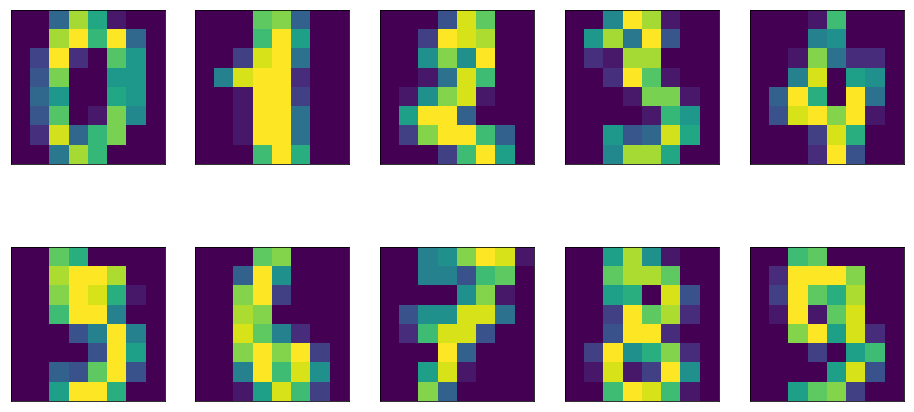

In [163]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axs = plt.subplots(2,5,figsize=(16,8), subplot_kw={'xticks':(), 'yticks':()})
for ax, img in zip(axs.ravel(), digits.images):
    ax.imshow(img)

Text(0,0.5,'2nd Principle Component')

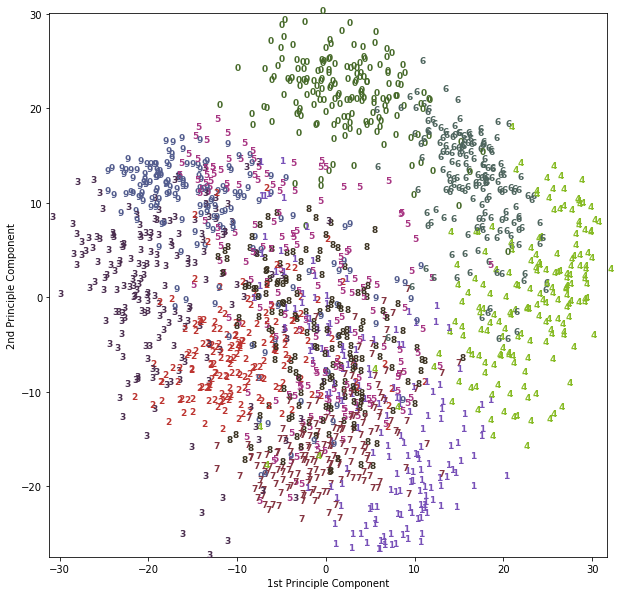

In [165]:
pca = PCA(n_components=2)
pca.fit(digits.data)

digits_pca = pca.transform(digits.data)
colors = ['#476A2A', '#7851B8', '#BD3430', '#4A2D4E', '#87BB25', 
          '#A83683', '#4E655E', '#853541', '#3A3120', '#535D8E']
plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:,0].min(), digits_pca[:,0].max())
plt.ylim(digits_pca[:,1].min(), digits_pca[:,1].max())

for i in range(len(digits.data)):
    plt.text(digits_pca[i,0], digits_pca[i,1], str(digits.target[i]), color=colors[digits.target[i]], 
            fontdict={'weight': 'bold', 'size':9})
plt.xlabel('1st Principle Component')
plt.ylabel('2nd Principle Component')

Text(0,0.5,'T-SNE Feature 1')

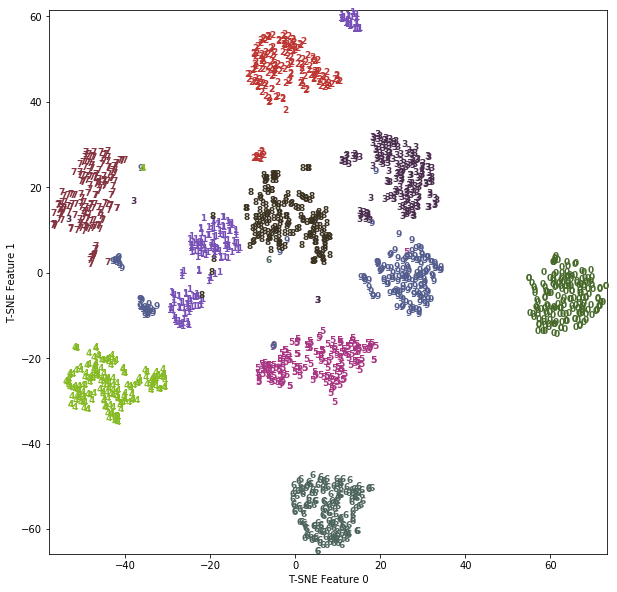

In [168]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(digits.data)

plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:,0].min(), digits_tsne[:,0].max() + 1)
plt.ylim(digits_tsne[:,1].min(), digits_tsne[:,1].max() + 1)

for i in range(len(digits.data)):
    plt.text(digits_tsne[i,0], digits_tsne[i,1], str(digits.target[i]), color=colors[digits.target[i]], 
            fontdict={'weight': 'bold', 'size':9})
plt.xlabel('T-SNE Feature 0')
plt.ylabel('T-SNE Feature 1')

## 3.4 군집

### 3.4.1 K-means Cluster

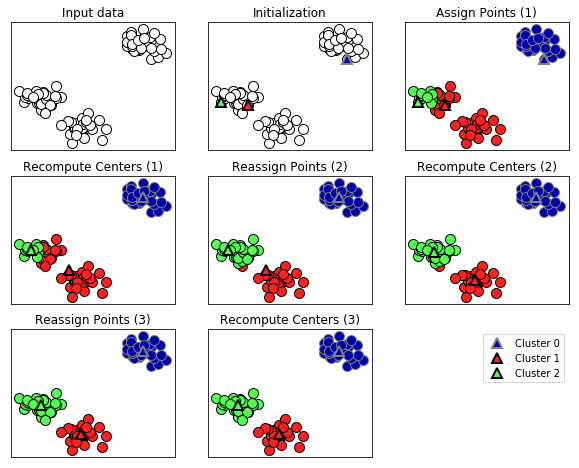

In [169]:
mglearn.plots.plot_kmeans_algorithm()

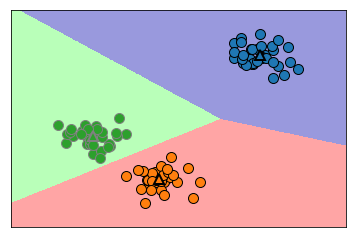

In [170]:
mglearn.plots.plot_kmeans_boundaries()

In [181]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(random_state=1)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [182]:
predict = kmeans.predict(X)
predict

array([0, 1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 1, 1, 2, 1,
       2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1,
       1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2,
       0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 0])

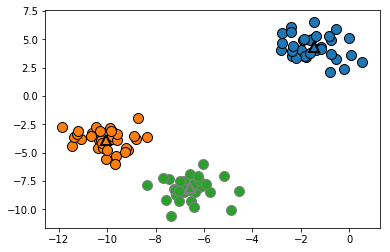

In [183]:
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],[0,1,2], markers='^', markeredgewidth=2)

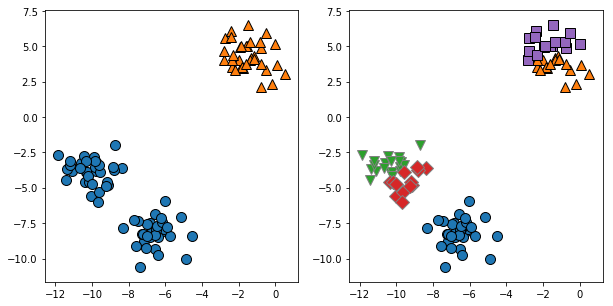

In [186]:
fig, axs = plt.subplots(1,2,figsize=(10,5))
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:,0],X[:,1], assignments, ax=axs[0])

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:,0],X[:,1], assignments, ax=axs[1])

Text(0,0.5,'Feature 1')

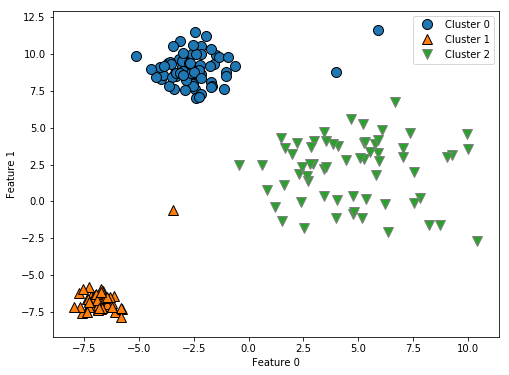

In [190]:
X_varied, y_varied = make_blobs(n_samples=200, cluster_std=[1.0,2.5,0.5], random_state=42)
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_varied)

plt.figure(figsize=(8,6))
mglearn.discrete_scatter(X_varied[:,0], X_varied[:,1], y_pred)
plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'], loc='best')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

Text(0,0.5,'Feature 1')

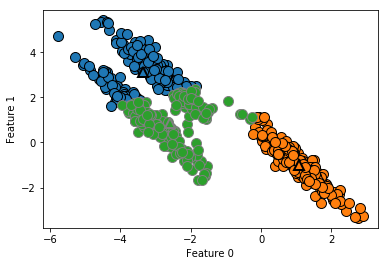

In [199]:
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

transformation = rng.normal(size=(2,2))
X = np.dot(X, transformation)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], [0,1,2], markers='^', markeredgewidth=2)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

Text(0,0.5,'Feature 1')

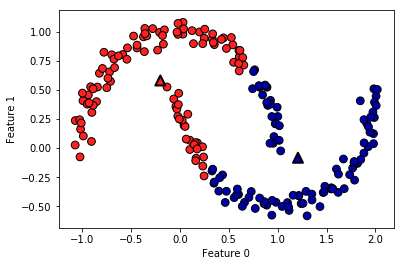

In [201]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)] ,
           s=100, linewidth=2, edgecolors='k')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

In [214]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255.

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=42)
nmf= NMF(n_components=100, random_state=0)
nmf.fit(X_train)
pca= PCA(n_components=100, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

Text(0,0.5,'nmf')

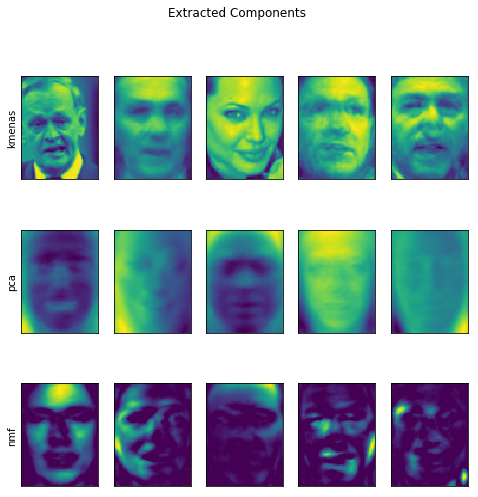

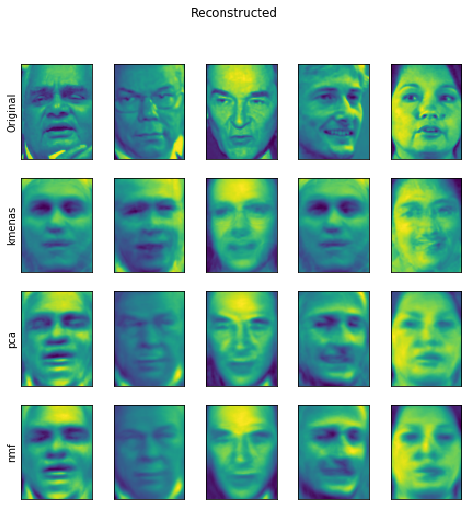

In [217]:
fig, axs = plt.subplots(3,5, figsize=(8,8), subplot_kw={'xticks':(), 'yticks':()})
fig.suptitle('Extracted Components')
for ax, comp_kmeans, comp_pca, comp_nmf in zip(axs.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))

axs[0,0].set_ylabel('kmenas')
axs[1,0].set_ylabel('pca')
axs[2,0].set_ylabel('nmf')

fig, axs = plt.subplots(4,5, figsize=(8,8), subplot_kw={'xticks':(), 'yticks':()})
fig.suptitle('Reconstructed')
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(axs.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca, X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))

axs[0,0].set_ylabel('Original')
axs[1,0].set_ylabel('kmenas')
axs[2,0].set_ylabel('pca')
axs[3,0].set_ylabel('nmf')

cluster label:
 [9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


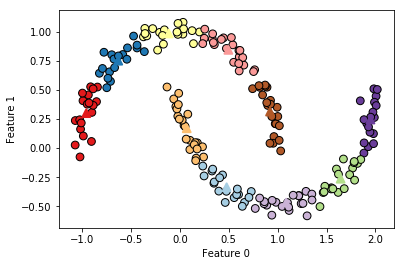

In [235]:
X, y = make_moons(n_samples=200, noise=.05, random_state=0)
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:,0],X[:,1], c=y_pred, s=60, cmap='Paired', edgecolors='black')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=60, marker='^', c=range(kmeans.n_clusters), 
           linewidth=2, cmap='Paired')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
print('cluster label:\n', y_pred)

In [241]:
distance_features = kmeans.transform(X)
print('Cluster distance data shape :', distance_features.shape)
print('Cluster distance :\n', distance_features)

Cluster distance data shape : (200, 10)
Cluster distance :
 [[0.9220768  1.46553151 1.13956805 ... 1.16559918 1.03852189 0.23340263]
 [1.14159679 2.51721597 0.1199124  ... 0.70700803 2.20414144 0.98271691]
 [0.78786246 0.77354687 1.74914157 ... 1.97061341 0.71561277 0.94399739]
 ...
 [0.44639122 1.10631579 1.48991975 ... 1.79125448 1.03195812 0.81205971]
 [1.38951924 0.79790385 1.98056306 ... 1.97788956 0.23892095 1.05774337]
 [1.14920754 2.4536383  0.04506731 ... 0.57163262 2.11331394 0.88166689]]


### 3.4.2 Agglomerative Clustering(병합군집)

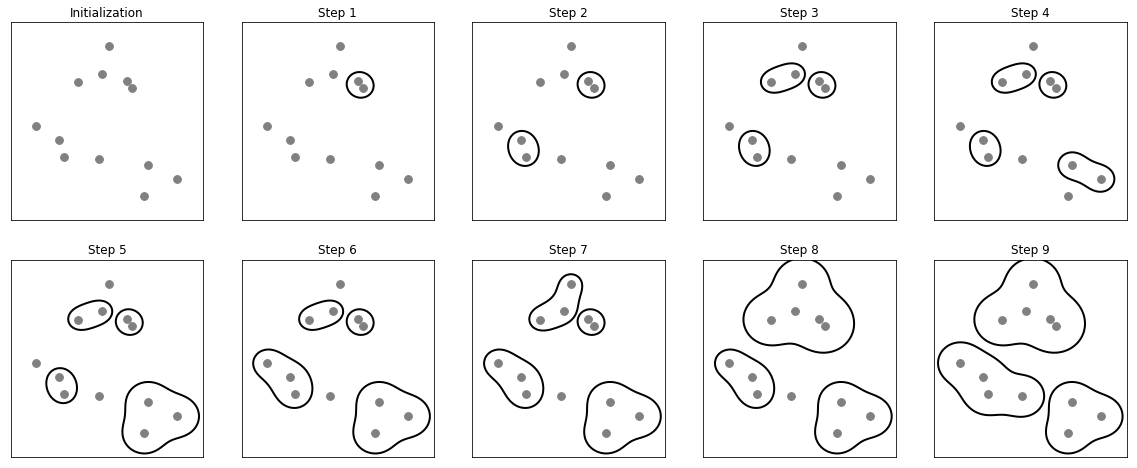

In [242]:
mglearn.plots.plot_agglomerative_algorithm()

Text(0.5,1,'linkage - complete')

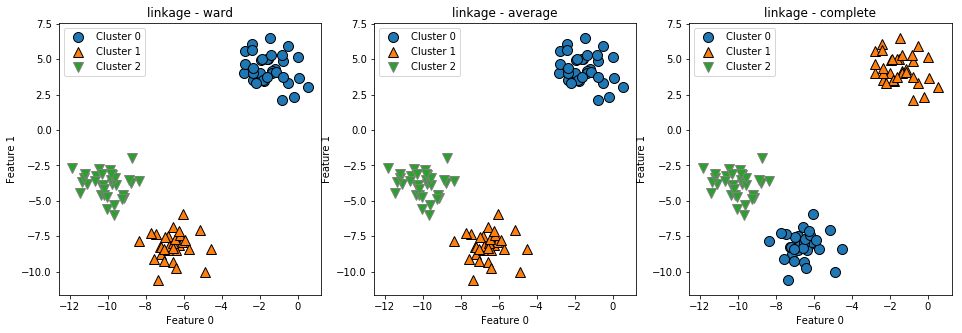

In [258]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)
fig, axs = plt.subplots(1,3, figsize=(16,5))

agg = AgglomerativeClustering(n_clusters=3) #default linkage='ward'
assignment = agg.fit_predict(X)
mglearn.discrete_scatter(X[:,0], X[:,1], assignment, ax=axs[0])
axs[0].legend(['Cluster 0', 'Cluster 1', 'Cluster 2'], loc='best')
axs[0].set_xlabel('Feature 0')
axs[0].set_ylabel('Feature 1')
axs[0].set_title('linkage - ward')

agg = AgglomerativeClustering(n_clusters=3, linkage='average') 
mglearn.discrete_scatter(X[:,0], X[:,1], assignment, ax=axs[1])
axs[1].legend(['Cluster 0', 'Cluster 1', 'Cluster 2'], loc='best')
axs[1].set_xlabel('Feature 0')
axs[1].set_ylabel('Feature 1')
axs[1].set_title('linkage - average')

agg = AgglomerativeClustering(n_clusters=3, linkage='complete') 
assignment = agg.fit_predict(X)
mglearn.discrete_scatter(X[:,0], X[:,1], assignment, ax=axs[2])
axs[2].legend(['Cluster 0', 'Cluster 1', 'Cluster 2'], loc='best')
axs[2].set_xlabel('Feature 0')
axs[2].set_ylabel('Feature 1')
axs[2].set_title('linkage - complete')